# Limpieza de datos

- Voy a trabajar con el archivo creado tras la exploración de datos denominado "airbnb.xlsx"
- Según el análisis de las variables:
    - Tenemos nulos en:
        - host_is_superhost (0,14%)
        - bathrooms_text (0,13%)
        - bedrooms (7,58%) y es una variable importante
        - beds (1,8%)
        - review_scores_rating (26,6%)
    - Hay dos variables que supuestamente tienen el mismo significado, pero que tienen dadtos diferentes:
        - host_listings_count
        - calculated_host_listings_count


## Importación librerías y carga de archivo

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [75]:
df = pd.read_excel("./data/airbnb.xlsx",index_col=0,parse_dates=['host_since'])
df.head(5)

,id,host_id,host_is_superhost,name,host_name,host_since,amenities,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count
0,6369,13660,t,"Rooftop terrace room , ensuite bathroom",Simon,2009-04-16,"[""Wifi"", ""Shampoo"", ""Extra pillows and blanket...",1.0,Hispanoamérica,Chamartín,...,2,1 shared bath,1.0,1.0,$60.00,1,1125,80,4.87,2
1,21853,83531,f,Bright and airy room,Abdel,2010-02-21,"[""Free parking on premises"", ""Shampoo"", ""Pocke...",2.0,Cármenes,Latina,...,1,1 bath,1.0,1.0,$31.00,4,40,33,4.58,2
2,23001,82175,f,Apartmento Arganzuela- Madrid Rio,Jesus,2010-02-17,"[""Shampoo"", ""Pool"", ""Paid parking on premises""...",10.0,Legazpi,Arganzuela,...,6,2 baths,3.0,5.0,$50.00,15,730,0,NaN,5
3,24805,346366726,f,Gran Via Studio Madrid,A,2020-05-15,"[""Shampoo"", ""Pack \u2019n Play/travel crib"", ""...",1.0,Universidad,Centro,...,3,1 bath,NaN,1.0,$92.00,5,1125,12,4.92,1
4,26825,114340,f,Single Room whith private Bathroom,Agustina,2010-04-27,"[""Wifi"", ""Shampoo"", ""Dishes and silverware"", ""...",1.0,Legazpi,Arganzuela,...,1,1 private bath,1.0,1.0,$26.00,2,1125,149,4.68,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18909 entries, 0 to 18908
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18909 non-null  int64         
 1   host_id                         18909 non-null  int64         
 2   host_is_superhost               18883 non-null  object        
 3   name                            18906 non-null  object        
 4   host_name                       18883 non-null  object        
 5   host_since                      18883 non-null  datetime64[ns]
 6   amenities                       18909 non-null  object        
 7   host_listings_count             18883 non-null  float64       
 8   neighbourhood_cleansed          18909 non-null  object        
 9   neighbourhood_group_cleansed    18909 non-null  object        
 10  latitude                        18909 non-null  float64       
 11  longitu

## Funciones

## Duplicados

In [77]:
df.duplicated().sum()

0

No hay duplicados

## Nulos 

### Nulos: beds
Variables de las que podría estimar rellenar los nulos:
- accommodates
- bedrooms (tiene muchos nulos)

In [78]:
df[["accommodates","beds"]].describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,18909.0,3.094928,1.963715,0.0,2.0,2.0,4.0,16.0
beds,18568.0,1.923578,1.452291,0.0,1.0,1.0,2.0,24.0


In [79]:
df[["accommodates","beds"]].median()

accommodates    2.0
beds            1.0
dtype: float64

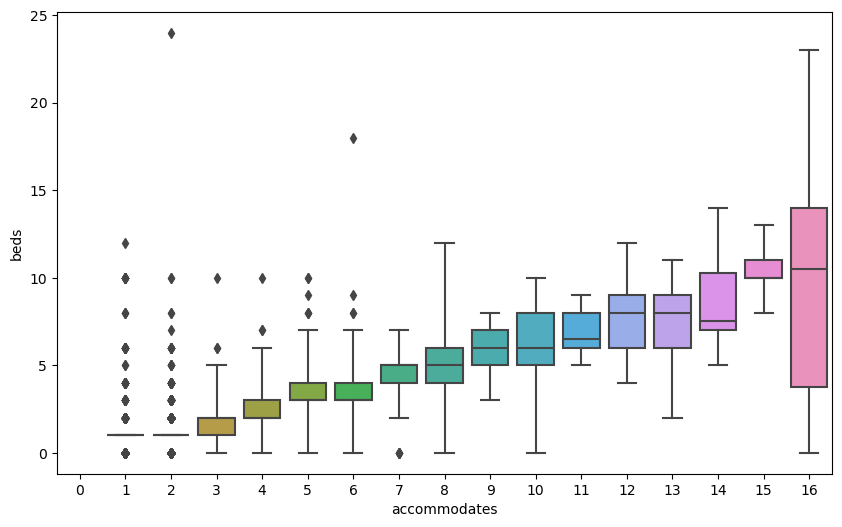

In [80]:
f, asx = plt.subplots(figsize = (10,6))

sns.boxplot(x="accommodates", y="beds",data=df, whis=3);


In [81]:
condicion_1 = df["accommodates"] == 1
condicion_2 = df["accommodates"] == 2
df.loc[condicion_1 | condicion_2,"beds"].value_counts()

beds
1.0     7676
2.0     1230
0.0      481
3.0       93
4.0       48
6.0       23
10.0      12
5.0        7
8.0        5
7.0        1
12.0       1
24.0       1
Name: count, dtype: int64

Tenemos muchos outliers, si bien la media/mediana sería una representación bastante lógica de la realidad.  
Como el número de nulos no es muy elevado, tomo la mediana como referencia para rellenar los nulos de la variable beds.

In [82]:
df.groupby("accommodates")["beds"].median()

accommodates
0      NaN
1      1.0
2      1.0
3      2.0
4      2.0
5      3.0
6      3.0
7      5.0
8      5.0
9      6.0
10     6.0
11     6.5
12     8.0
13     8.0
14     7.5
15    10.0
16    10.5
Name: beds, dtype: float64

In [83]:
df["mediana_beds"] = df.groupby("accommodates")["beds"].transform("median")

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18909 entries, 0 to 18908
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18909 non-null  int64         
 1   host_id                         18909 non-null  int64         
 2   host_is_superhost               18883 non-null  object        
 3   name                            18906 non-null  object        
 4   host_name                       18883 non-null  object        
 5   host_since                      18883 non-null  datetime64[ns]
 6   amenities                       18909 non-null  object        
 7   host_listings_count             18883 non-null  float64       
 8   neighbourhood_cleansed          18909 non-null  object        
 9   neighbourhood_group_cleansed    18909 non-null  object        
 10  latitude                        18909 non-null  float64       
 11  longitu

In [85]:
df[["beds","mediana_beds"]]

,beds,mediana_beds
0,1.0,1.0
1,1.0,1.0
2,5.0,3.0
3,1.0,2.0
4,1.0,1.0
...,...,...
18904,0.0,1.0
18905,0.0,1.0
18906,0.0,1.0
18907,0.0,1.0


In [86]:
df.beds = df.beds.fillna(df["mediana_beds"])

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18909 entries, 0 to 18908
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18909 non-null  int64         
 1   host_id                         18909 non-null  int64         
 2   host_is_superhost               18883 non-null  object        
 3   name                            18906 non-null  object        
 4   host_name                       18883 non-null  object        
 5   host_since                      18883 non-null  datetime64[ns]
 6   amenities                       18909 non-null  object        
 7   host_listings_count             18883 non-null  float64       
 8   neighbourhood_cleansed          18909 non-null  object        
 9   neighbourhood_group_cleansed    18909 non-null  object        
 10  latitude                        18909 non-null  float64       
 11  longitu

### Nulos: bedrooms
Parece lógico pensar que la cantidad de habitaciones estará ligado tanto al número de camas como al número de huéspedes potenciales a alojar

In [88]:
df[["bedrooms","beds","accommodates"]].describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,17475.0,1.442003,0.834063,1.0,1.0,1.0,2.0,18.0
beds,18906.0,1.909923,1.445905,0.0,1.0,1.0,2.0,24.0
accommodates,18909.0,3.094928,1.963715,0.0,2.0,2.0,4.0,16.0


In [89]:
df.groupby("beds")[["bedrooms"]].median()

,bedrooms
beds,
0.0,1.0
1.0,1.0
2.0,1.0
3.0,2.0
4.0,2.0
5.0,3.0
6.0,3.0
7.0,4.0
8.0,4.0


In [90]:
df.groupby(["beds","accommodates"])["bedrooms"].median()

beds  accommodates
0.0   1                1.0
      2                1.0
      3                1.0
      4                1.0
      5                2.0
                      ... 
17.0  16               6.5
18.0  6                2.0
      16               5.0
23.0  16              15.0
24.0  2               14.0
Name: bedrooms, Length: 139, dtype: float64

In [91]:
df["mediana_bedrooms"] = df.groupby(["beds"])["bedrooms"].transform("median")

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18909 entries, 0 to 18908
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18909 non-null  int64         
 1   host_id                         18909 non-null  int64         
 2   host_is_superhost               18883 non-null  object        
 3   name                            18906 non-null  object        
 4   host_name                       18883 non-null  object        
 5   host_since                      18883 non-null  datetime64[ns]
 6   amenities                       18909 non-null  object        
 7   host_listings_count             18883 non-null  float64       
 8   neighbourhood_cleansed          18909 non-null  object        
 9   neighbourhood_group_cleansed    18909 non-null  object        
 10  latitude                        18909 non-null  float64       
 11  longitu

In [93]:
df["bedrooms"]= df["bedrooms"].fillna(df["mediana_bedrooms"])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18909 entries, 0 to 18908
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18909 non-null  int64         
 1   host_id                         18909 non-null  int64         
 2   host_is_superhost               18883 non-null  object        
 3   name                            18906 non-null  object        
 4   host_name                       18883 non-null  object        
 5   host_since                      18883 non-null  datetime64[ns]
 6   amenities                       18909 non-null  object        
 7   host_listings_count             18883 non-null  float64       
 8   neighbourhood_cleansed          18909 non-null  object        
 9   neighbourhood_group_cleansed    18909 non-null  object        
 10  latitude                        18909 non-null  float64       
 11  longitu

### Nulos: bathrooms_text
- Lo primero sería limpiar la columna dado que contiene una cadena de caracteres entre los que se encuentra el número de baños
- Luego habría que rellenar el número de baños faltantes dado que se generan unos pocos nulos

In [95]:
# Vistazo a los valores que contiene
df["bathrooms_text"].value_counts()

bathrooms_text
1 bath               8646
1 shared bath        3699
2 baths              2225
1 private bath       1182
1.5 baths             924
1.5 shared baths      688
2 shared baths        529
3 baths               261
2.5 baths             159
Private half-bath     102
0 shared baths         70
3 shared baths         56
4 shared baths         54
4 baths                50
2.5 shared baths       37
0 baths                36
3.5 baths              26
Shared half-bath       22
5 baths                18
4.5 baths              17
Half-bath              15
6 baths                12
6 shared baths         10
4.5 shared baths        8
5 shared baths          7
8 shared baths          7
5.5 baths               4
3.5 shared baths        3
6.5 baths               3
7 baths                 3
11 shared baths         3
10 baths                3
5.5 shared baths        1
7 shared baths          1
11 baths                1
8 baths                 1
14 baths                1
Name: count, dtype: int

In [96]:
# Aplico una regex para sacar la parte numérica. Lo que no encuentre lo rellenará como NaN
import re
df["bathrooms"] = df["bathrooms_text"]\
.apply(lambda x: re.findall(r"^\d\.?\d?",str(x))[0] if re.findall(r"\d\.?\d?", str(x)) else np.nan)

In [97]:
# Reviso la creación de la nueva columna y el tipo de variable
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18909 entries, 0 to 18908
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18909 non-null  int64         
 1   host_id                         18909 non-null  int64         
 2   host_is_superhost               18883 non-null  object        
 3   name                            18906 non-null  object        
 4   host_name                       18883 non-null  object        
 5   host_since                      18883 non-null  datetime64[ns]
 6   amenities                       18909 non-null  object        
 7   host_listings_count             18883 non-null  float64       
 8   neighbourhood_cleansed          18909 non-null  object        
 9   neighbourhood_group_cleansed    18909 non-null  object        
 10  latitude                        18909 non-null  float64       
 11  longitu

In [98]:
# Trato de cambiarlo a float64 que sería su verdadero tipo (float, porque ya venía con decimales)
df["bathrooms"] = df["bathrooms"].apply(lambda x: float(x))

In [99]:
# Reviso
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18909 entries, 0 to 18908
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18909 non-null  int64         
 1   host_id                         18909 non-null  int64         
 2   host_is_superhost               18883 non-null  object        
 3   name                            18906 non-null  object        
 4   host_name                       18883 non-null  object        
 5   host_since                      18883 non-null  datetime64[ns]
 6   amenities                       18909 non-null  object        
 7   host_listings_count             18883 non-null  float64       
 8   neighbourhood_cleansed          18909 non-null  object        
 9   neighbourhood_group_cleansed    18909 non-null  object        
 10  latitude                        18909 non-null  float64       
 11  longitu

In [100]:
# Decido con qué variable podemos tomar como referencia para rellenar los nulos (que son muy poquitos)
df.groupby("bedrooms")["bathrooms"].describe()

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
1.0,13387.0,1.145589,0.504592,0.0,1.00,1.0,1.00,11.0
2.0,3650.0,1.416849,0.518106,0.0,1.00,1.0,2.00,6.0
3.0,1242.0,1.831723,0.685307,0.0,1.00,2.0,2.00,5.0
4.0,310.0,2.312903,0.921074,1.0,2.00,2.0,3.00,5.0
5.0,104.0,3.000000,1.279032,0.0,2.00,3.0,4.00,5.5
6.0,24.0,3.020833,1.802650,1.0,2.00,2.0,4.00,6.5
7.0,11.0,4.636364,1.898564,1.0,3.50,4.5,6.00,7.0
8.0,7.0,2.785714,2.078805,0.0,1.00,4.0,4.00,5.5
9.0,3.0,3.333333,2.516611,1.0,2.00,3.0,4.50,6.0


In [101]:
df.groupby("accommodates")["bathrooms"].describe()

,count,mean,std,min,25%,50%,75%,max
accommodates,,,,,,,,
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3213.0,1.224868,0.669167,0.0,1.00,1.00,1.000,11.0
2,6533.0,1.143196,0.481881,0.0,1.00,1.00,1.000,14.0
3,1734.0,1.124856,0.361298,0.0,1.00,1.00,1.000,6.0
4,4163.0,1.227000,0.479013,0.0,1.00,1.00,1.000,10.0
5,821.0,1.434227,0.557595,0.0,1.00,1.00,2.000,5.5
6,1498.0,1.706609,0.662128,1.0,1.00,2.00,2.000,5.0
7,205.0,1.939024,0.820951,0.0,1.00,2.00,2.000,5.0
8,324.0,2.118827,0.833091,0.0,2.00,2.00,2.500,5.0


Parece que la media de baños por número de huéspedes (accommodates) parece más lineal y lógica que la media por habitación, donde hay muchos saltos y valores desproporcionados.  
Como son pocos nulos, opto por la mediana en función de los baños.

In [102]:
# Creo nueva oclumna con la mediana de los baños en función del número de huéspedes que puede tener
df["mediana_bathrooms"] = df.groupby("accommodates")["bathrooms"].transform("median")

In [103]:
# Reviso
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18909 entries, 0 to 18908
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18909 non-null  int64         
 1   host_id                         18909 non-null  int64         
 2   host_is_superhost               18883 non-null  object        
 3   name                            18906 non-null  object        
 4   host_name                       18883 non-null  object        
 5   host_since                      18883 non-null  datetime64[ns]
 6   amenities                       18909 non-null  object        
 7   host_listings_count             18883 non-null  float64       
 8   neighbourhood_cleansed          18909 non-null  object        
 9   neighbourhood_group_cleansed    18909 non-null  object        
 10  latitude                        18909 non-null  float64       
 11  longitu

In [104]:
# Relleno los nulos de bathrooms con la mediana de la variable mediana_bathrooms
df["bathrooms"]= df["bathrooms"].fillna(df["mediana_bathrooms"])

In [105]:
# Reviso
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18909 entries, 0 to 18908
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18909 non-null  int64         
 1   host_id                         18909 non-null  int64         
 2   host_is_superhost               18883 non-null  object        
 3   name                            18906 non-null  object        
 4   host_name                       18883 non-null  object        
 5   host_since                      18883 non-null  datetime64[ns]
 6   amenities                       18909 non-null  object        
 7   host_listings_count             18883 non-null  float64       
 8   neighbourhood_cleansed          18909 non-null  object        
 9   neighbourhood_group_cleansed    18909 non-null  object        
 10  latitude                        18909 non-null  float64       
 11  longitu

### Nulos: Host_is_superhost

In [106]:
df['host_is_superhost'].unique()

array(['t', 'f', nan], dtype=object)

In [107]:
df['host_is_superhost'].isna().sum()

26

In [108]:
df['host_is_superhost'].value_counts(normalize=True).round(2)*100

host_is_superhost
f    82.0
t    18.0
Name: proportion, dtype: float64

Al ser pocos nulos voy a rellenarlos como que no son superhost dado que hay una gran mayoría que no lo son.

In [109]:
df['host_is_superhost']=df['host_is_superhost'].fillna('f')

In [110]:
df['host_is_superhost'].isna().sum()

0

## Valores faltantes

In [111]:
# Reviso dónde están los nulos
df.loc[df["beds"].isna()]

,id,host_id,host_is_superhost,name,host_name,host_since,amenities,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,mediana_beds,mediana_bedrooms,bathrooms,mediana_bathrooms
14456,43078553,310825661,f,NH Madrid Atocha,NH Atocha,2019-11-20,"[""Bed sheets and pillows"", ""Safe"", ""First aid ...",0.0,Jerónimos,Retiro,...,$0.00,1,365,0,NaN,1,NaN,NaN,NaN,NaN
15325,45167108,364774870,f,BLESS Hotel Madrid 5*,Bless Hotel Madrid,2020-08-28,"[""Bottled water"", ""Onsite bar \u2014 Versus Lo...",0.0,Recoletos,Salamanca,...,$0.00,1,28,0,NaN,1,NaN,NaN,NaN,NaN
15636,45840787,371638561,f,Pestana Plaza Mayor,Pestana,2020-10-12,"[""Bed sheets and pillows"", ""Self-parking \u201...",0.0,Sol,Centro,...,$0.00,1,28,0,NaN,1,NaN,NaN,NaN,NaN


Son solo tres filas y tampoco tienen datos de precios. Las elimino.

In [112]:
# Elimino las tres filas
df.dropna(subset=["beds"],inplace = True)

In [113]:
# Reviso
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18906 entries, 0 to 18908
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18906 non-null  int64         
 1   host_id                         18906 non-null  int64         
 2   host_is_superhost               18906 non-null  object        
 3   name                            18903 non-null  object        
 4   host_name                       18880 non-null  object        
 5   host_since                      18880 non-null  datetime64[ns]
 6   amenities                       18906 non-null  object        
 7   host_listings_count             18880 non-null  float64       
 8   neighbourhood_cleansed          18906 non-null  object        
 9   neighbourhood_group_cleansed    18906 non-null  object        
 10  latitude                        18906 non-null  float64       
 11  longitu

### Transformo la variable "price"

In [114]:
df.price[:4]

0    $60.00
1    $31.00
2    $50.00
3    $92.00
Name: price, dtype: object

In [115]:
df['price'] = df['price'].apply(lambda x: x.replace('$',''))

In [116]:
df.price[:4]

0    60.00
1    31.00
2    50.00
3    92.00
Name: price, dtype: object

In [117]:
df['price'] = df['price'].str.replace(".00","").str.replace(",",".",regex=False).astype(float)

In [118]:
df.price[:4]

0    60.0
1    31.0
2    50.0
3    92.0
Name: price, dtype: float64

### Reviso contenido columnas host_listing_count y calculated_host_listings_count que en principio es lo mismo

In [119]:
df[["host_listings_count","calculated_host_listings_count"]]

,host_listings_count,calculated_host_listings_count
0,1.0,2
1,2.0,2
2,10.0,5
3,1.0,1
4,1.0,1
...,...,...
18904,0.0,87
18905,0.0,87
18906,0.0,87
18907,0.0,87


In [120]:
df[["host_listings_count","calculated_host_listings_count"]].describe()

,host_listings_count,calculated_host_listings_count
count,18880.000000,18906.000000
mean,11.608475,10.728129
std,32.345786,26.324774
min,0.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,6.000000,7.000000
max,515.000000,194.000000


Al final me quedo con las dos variables.  
Una es el total de propiedades que un anfitrion tiene listadas en un momento dado (host_listings-count)  
Y la otra (calculated_host_listings_count), es el número agrupado.  
Por ejemplo, pasa con las habitaciones de alquiler. En la primera variable se cuentan de forma independiente y en la segunda solo una como dentro del mismo inmueble.

# Preparo el dataset

Voy a hacer una copia de df y a eliminar columnas que ya no voy a necesitar para el análisis 

In [121]:
df_copia = df.copy()

In [122]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18906 entries, 0 to 18908
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18906 non-null  int64         
 1   host_id                         18906 non-null  int64         
 2   host_is_superhost               18906 non-null  object        
 3   name                            18903 non-null  object        
 4   host_name                       18880 non-null  object        
 5   host_since                      18880 non-null  datetime64[ns]
 6   amenities                       18906 non-null  object        
 7   host_listings_count             18880 non-null  float64       
 8   neighbourhood_cleansed          18906 non-null  object        
 9   neighbourhood_group_cleansed    18906 non-null  object        
 10  latitude                        18906 non-null  float64       
 11  longitu

In [123]:
# Reviso las columnas
df_copia.columns

Index(['id', 'host_id', 'host_is_superhost', 'name', 'host_name', 'host_since',
       'amenities', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating',
       'calculated_host_listings_count', 'mediana_beds', 'mediana_bedrooms',
       'bathrooms', 'mediana_bathrooms'],
      dtype='object')

In [124]:
# Elimino columnas que ya no voy a necesitar
columnas_a_eliminar = ['bathrooms_text','mediana_beds','mediana_bedrooms','mediana_bathrooms']

df_copia.drop(columns=columnas_a_eliminar,inplace=True)
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18906 entries, 0 to 18908
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18906 non-null  int64         
 1   host_id                         18906 non-null  int64         
 2   host_is_superhost               18906 non-null  object        
 3   name                            18903 non-null  object        
 4   host_name                       18880 non-null  object        
 5   host_since                      18880 non-null  datetime64[ns]
 6   amenities                       18906 non-null  object        
 7   host_listings_count             18880 non-null  float64       
 8   neighbourhood_cleansed          18906 non-null  object        
 9   neighbourhood_group_cleansed    18906 non-null  object        
 10  latitude                        18906 non-null  float64       
 11  longitu

In [125]:
df_copia.duplicated().sum()

0

Añado las columnas de otros df que me interesa tener para el análisis

In [126]:
# Cargo el data de idealista.xlsx
df_idealista = pd.read_excel("./data/idealista.xlsx")
df_idealista.head(5)

,Localización,Precio m2 marzo 2024,m2,Variación mensual,Variación trimestral,Variación anual,Máximo histórico,Variación máximo
0,Arganzuela,4595,€/m2,0.005,0.016,0.054,4.595 €/m2 mar 2024,0.000
1,Barajas,3549,€/m2,0.010,0.042,0.044,3.686 €/m2 mar 2009,-0.037
2,Carabanchel,2612,€/m2,0.004,0.016,0.101,3.173 €/m2 jun 2007,-0.177
3,Centro,6144,€/m2,0.009,0.045,0.171,6.144 €/m2 mar 2024,0.000
4,Chamartín,6039,€/m2,0.014,0.030,0.067,6.039 €/m2 mar 2024,0.000


In [127]:
# Me quedo con las columnas que me interesan de idealista.xlsx que son Localización y "Precio m2 marzo 2024"
df_idealista.rename(columns = {"Localización":"distrito","Precio m2 marzo 2024": "precio_m2"},inplace = True)


In [128]:
df_idealista_copia = df_idealista[["distrito","precio_m2"]]
df_idealista_copia

,distrito,precio_m2
0,Arganzuela,4595
1,Barajas,3549
2,Carabanchel,2612
3,Centro,6144
4,Chamartín,6039
5,Chamberí,6347
6,Ciudad Lineal,3497
7,Fuencarral,3909
8,Hortaleza,4133
9,Latina,2699


In [129]:
# Reviso que los valores de las columnas para los que se va a hacer el merge sean los mismos
sorted(df_copia.neighbourhood_group_cleansed.unique())

['Arganzuela',
 'Barajas',
 'Carabanchel',
 'Centro',
 'Chamartín',
 'Chamberí',
 'Ciudad Lineal',
 'Fuencarral - El Pardo',
 'Hortaleza',
 'Latina',
 'Moncloa - Aravaca',
 'Moratalaz',
 'Puente de Vallecas',
 'Retiro',
 'Salamanca',
 'San Blas - Canillejas',
 'Tetuán',
 'Usera',
 'Vicálvaro',
 'Villa de Vallecas',
 'Villaverde']

In [130]:
sorted(df_idealista_copia.distrito.unique())

['Arganzuela',
 'Barajas',
 'Carabanchel',
 'Centro',
 'Chamartín',
 'Chamberí',
 'Ciudad Lineal',
 'Fuencarral',
 'Hortaleza',
 'Latina',
 'Moncloa',
 'Moratalaz',
 'Puente de Vallecas',
 'Retiro',
 'Salamanca',
 'San Blas',
 'Tetuán',
 'Usera',
 'Vicálvaro',
 'Villa de Vallecas',
 'Villaverde']

In [131]:
# Hago coincidir los nombres cambiándolos en idealista.xlsx dado que se hará un left join sobre la otra tabla
columnas_a_cambiar = {'Fuencarral':'Fuencarral - El Pardo',
                      'Moncloa':'Moncloa - Aravaca',
                      'San Blas':'San Blas - Canillejas'}

df_idealista_copia["distrito"]=df_idealista_copia["distrito"].replace(columnas_a_cambiar)

C:\Users\Alfonso\AppData\Local\Temp\ipykernel_15232\167382007.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idealista_copia["distrito"]=df_idealista_copia["distrito"].replace(columnas_a_cambiar)


In [132]:
sorted(df_idealista_copia.distrito.unique())

['Arganzuela',
 'Barajas',
 'Carabanchel',
 'Centro',
 'Chamartín',
 'Chamberí',
 'Ciudad Lineal',
 'Fuencarral - El Pardo',
 'Hortaleza',
 'Latina',
 'Moncloa - Aravaca',
 'Moratalaz',
 'Puente de Vallecas',
 'Retiro',
 'Salamanca',
 'San Blas - Canillejas',
 'Tetuán',
 'Usera',
 'Vicálvaro',
 'Villa de Vallecas',
 'Villaverde']

In [133]:
# Hago la unión
df_copia = pd.merge(left=df_copia,right=df_idealista_copia,how = "left" ,left_on="neighbourhood_group_cleansed",right_on="distrito")
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18906 entries, 0 to 18905
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18906 non-null  int64         
 1   host_id                         18906 non-null  int64         
 2   host_is_superhost               18906 non-null  object        
 3   name                            18903 non-null  object        
 4   host_name                       18880 non-null  object        
 5   host_since                      18880 non-null  datetime64[ns]
 6   amenities                       18906 non-null  object        
 7   host_listings_count             18880 non-null  float64       
 8   neighbourhood_cleansed          18906 non-null  object        
 9   neighbourhood_group_cleansed    18906 non-null  object        
 10  latitude                        18906 non-null  float64       
 11  lo

# Cargo el df en un excel

In [134]:
df_copia.to_excel("./data/airbnb_1.xlsx")